In [138]:
import numpy as np
import matplotlib.pyplot as plt

### Just some matplotlib tweaks
import matplotlib as mpl

mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 1.5
mpl.rcParams["figure.dpi"] = 200
from matplotlib import rc
rc('font', family='serif')
rc('text', usetex=True)
rc('xtick', labelsize='medium')
rc('ytick', labelsize='medium')
rc("axes", labelsize = "large")
def cm2inch(value):
    return value/2.54

In [139]:
z = np.linspace(10e-9, 5e-6, 10000)
a = 1.5e-6
D0 = 4e-21 / (6*np.pi * 0.001 * a)
#taking alpha  = 1
v_noise = 2*D0 * a * (2*a**2 + 12 *a * z + 21 * z** 2) / (2*a**2 + 9*a*z + z**2)**2


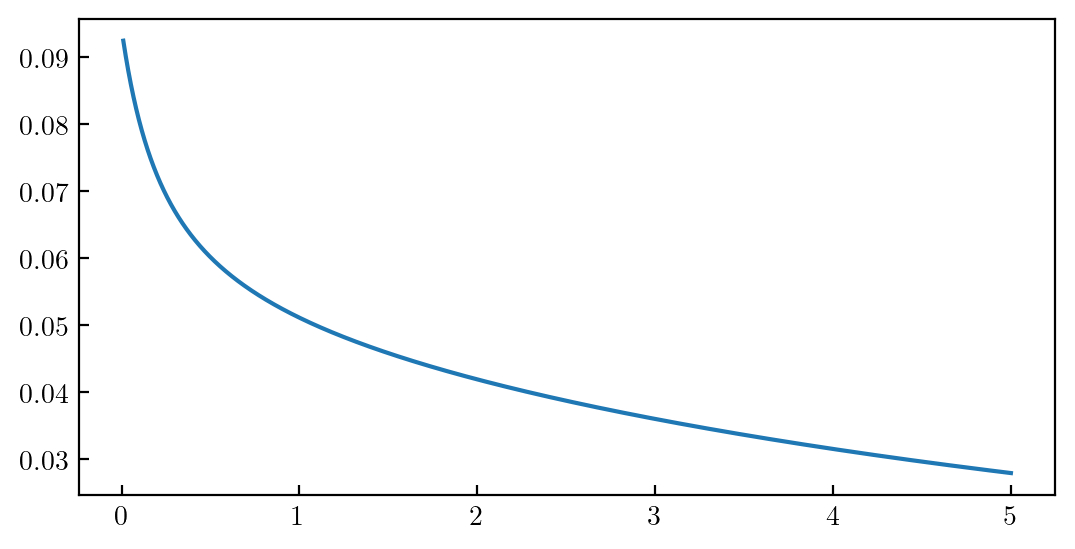

In [140]:
plt.figure(figsize=( cm2inch(16),cm2inch(8)))
plt.plot(z*1e6, v_noise*1e6)

In [141]:
def eta_z(z):
    return 0.001 * (6*z**2 + 9 * a * z + 2 * a**2)/(6*z**2 + 2*a*z)

def gamma(z):
    return 6 * np.pi * eta_z(z) * a

lb = 500e-9
ld = 50e-9
B = 4 #kt unit
def F_z(z):
    return - 4e-21 * (-1/ld * B *np.exp(-z/ld)  + 1/lb)

In [142]:
v_deterministic = 1/gamma(z) * F_z(z)

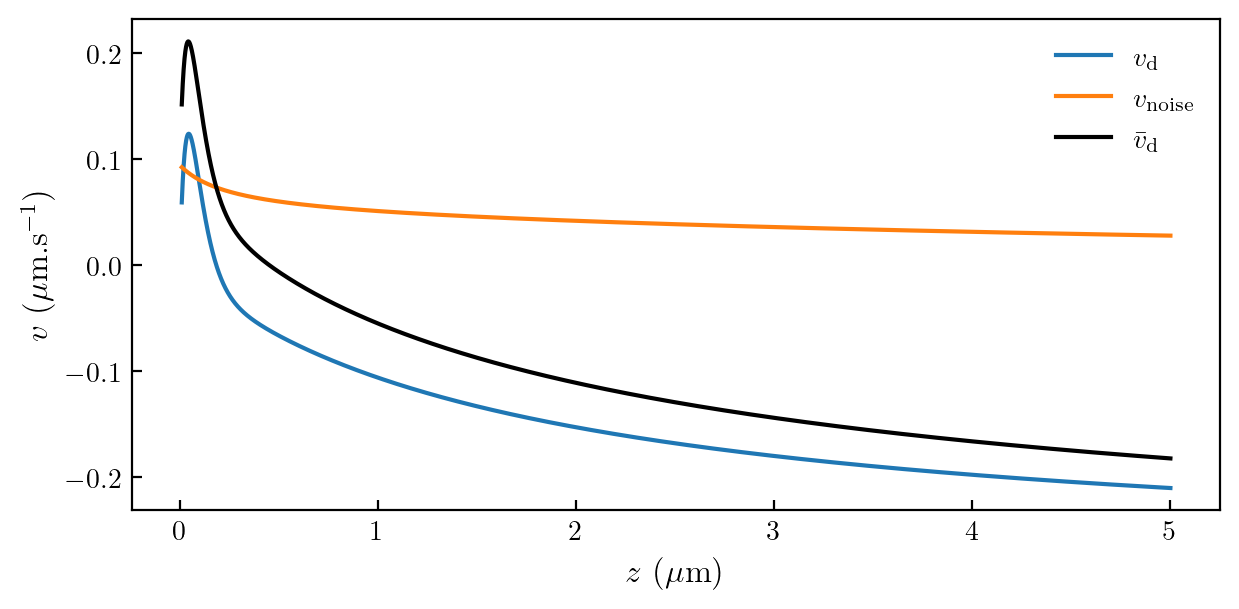

In [143]:
plt.figure(figsize=( cm2inch(16),cm2inch(8)))
plt.plot(z*1e6, v_deterministic*1e6, label = "$v_\mathrm{d}$")
plt.plot(z*1e6, v_noise*1e6, label="$v_\mathrm{noise}$")
plt.plot(z*1e6, v_noise*1e6 + v_deterministic*1e6, color = "black", label = "$\\bar{v}_\mathrm{d}$")
plt.ylabel("$v$ ($\\mathrm{\\mu m.s^{-1}}$)")
plt.xlabel("$z$ ($\\mathrm{\\mu m}$)")
plt.legend(frameon=False)
plt.tight_layout()

In [144]:
vtot = v_noise*1e6 + v_deterministic*1e6

In [145]:
vtot_gradient =np.abs(1/vtot* np.gradient(vtot, np.mean(np.diff(z))))

In [146]:
np.mean(np.diff(z))

4.990499049904991e-10

In [147]:
D_z = 4e-21 / gamma(z)
D_z_gradient = np.abs( 1/ D_z * np.gradient(D_z, np.mean(np.diff(z))))

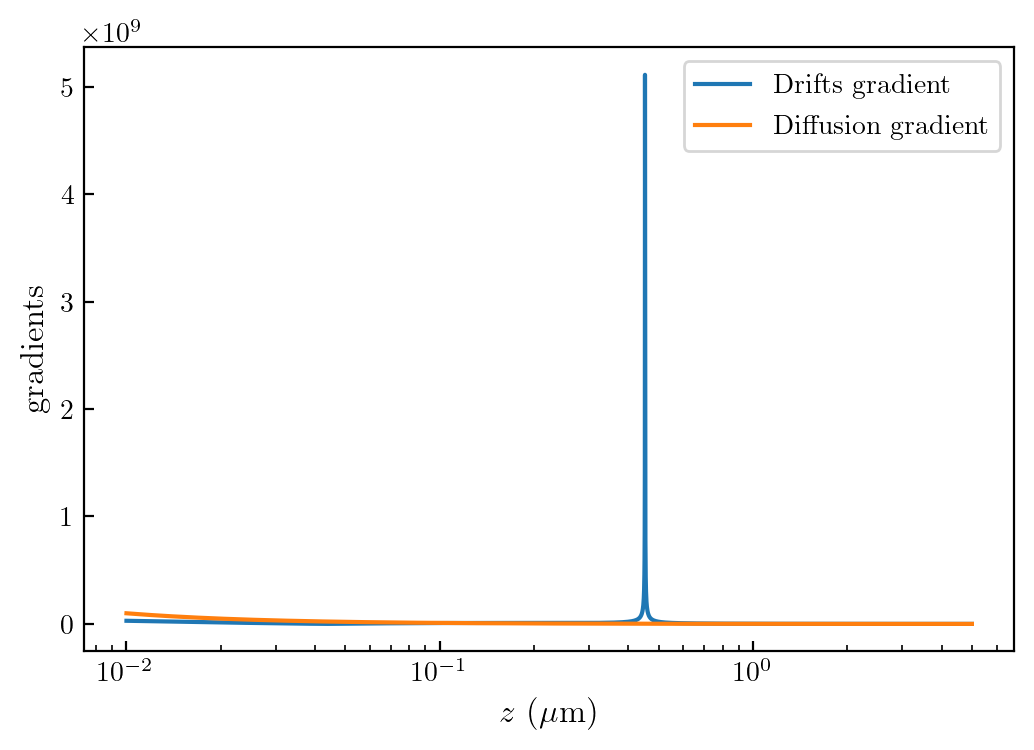

In [148]:
plt.semilogx(z*1e6, vtot_gradient, label = "Drifts gradient")
plt.semilogx(z*1e6, D_z_gradient, label = "Diffusion gradient")
plt.ylabel("gradients")
plt.xlabel("$z$ ($\mu$m)")
plt.legend()

In [187]:
D0 = 4e-21 / (6 * np.pi * 0.001 * 1.5e-6)
a = 1.5e-6
def tau_max(ld, B, z):
    lb = 500e-9
    return a / (2*D0) * np.power((1/(B/ld + 1/lb) + z),2) / z

def min_tau_max(ld, B):
    lb = 500e-9
    return 2* a / D0 / (B/ld - 1/lb)


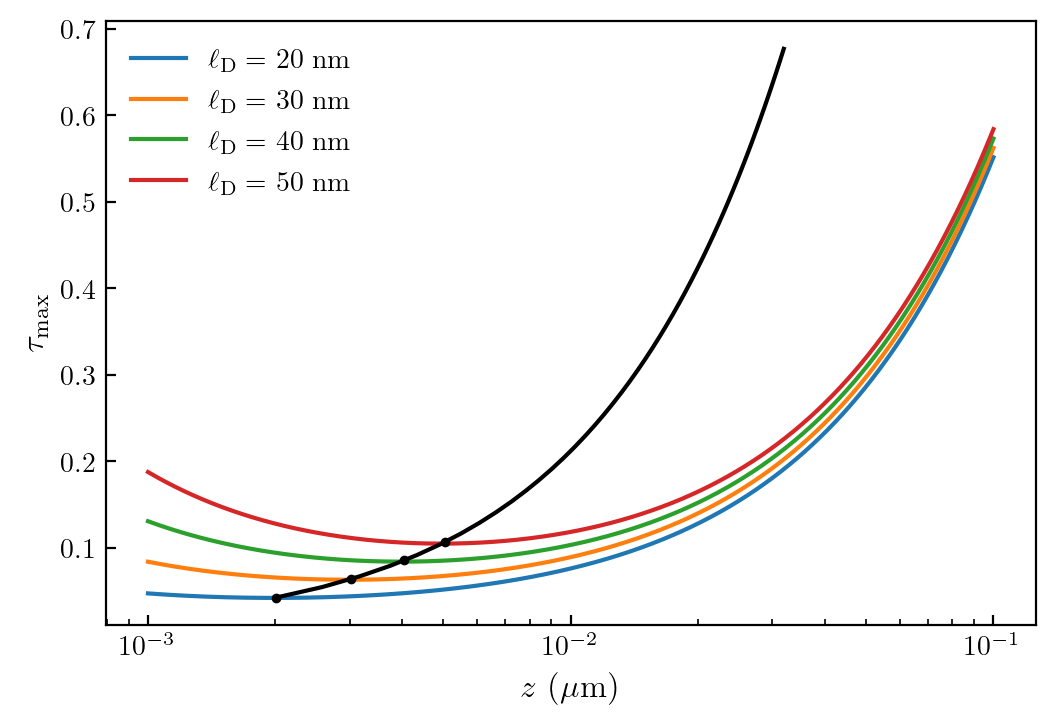

In [192]:
lb = 500e-9
B = 10
z = np.linspace(1e-9, 100e-9, 10000)

for i in [20e-9, 30e-9,40e-9, 50e-9]:
    plt.semilogx(z*1e6, tau_max(i, B, z), label= "$\ell_\mathrm{D} =$ " + str(np.round(i*1e9))[:-2] + " nm")
    plt.plot(1/(B/i - 1/lb)* 1e6, min_tau_max(i, B), "o", markersize = 2, color = "b")

lds = np.linspace(20e-9, 300e-9)
plt.plot(1/(B/lds - 1/lb)* 1e6, min_tau_max(lds, B), color = "black")

plt.ylabel("$\\tau_\mathrm{max}$")
plt.xlabel("$z$ ($\mu$m)")


plt.legend(frameon = False)



In [193]:
min_tau_max(i, B)

0.10709974955419752

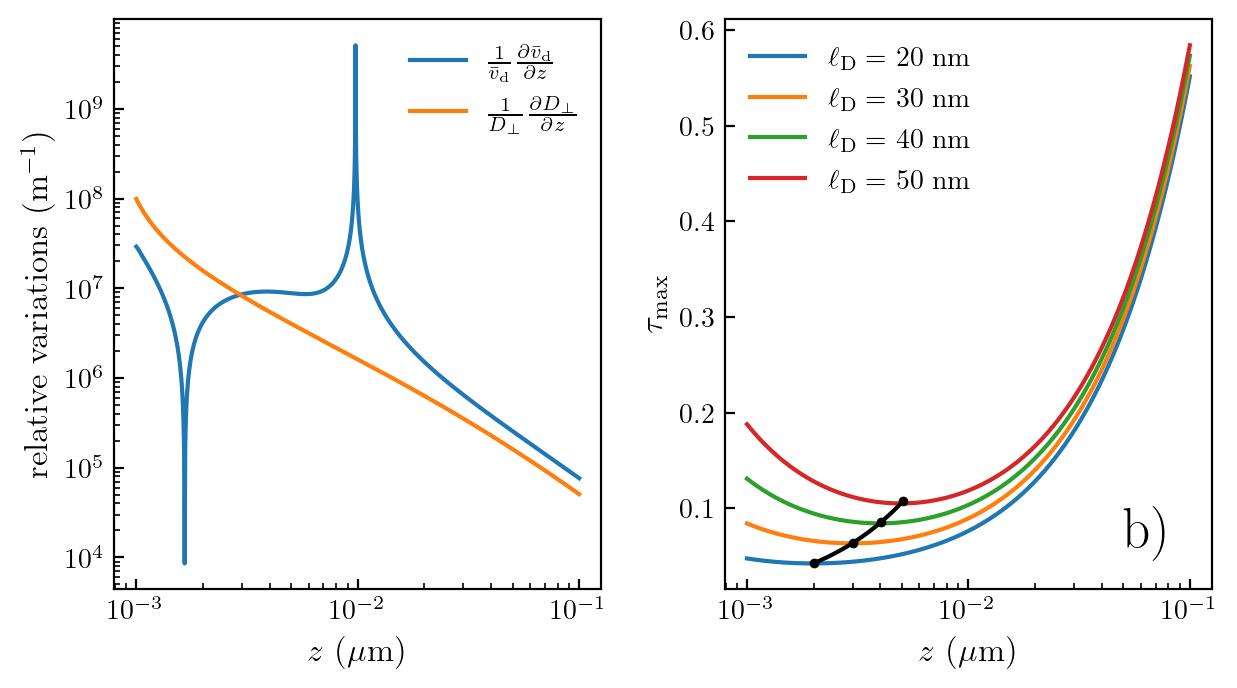

In [196]:
fig = plt.figure(figsize = (cm2inch(16),cm2inch(9)))
gs = fig.add_gridspec(1, 2)

fig.add_subplot(gs[0, 0])

plt.loglog(z*1e6, vtot_gradient, label = "$\\frac{1}{\\bar{v}_\\mathrm{d}} \\frac{\\partial \\bar{v}_\\mathrm{d} }{\partial z}$")
plt.plot(z*1e6, D_z_gradient, label = "$\\frac{1}{D_\\bot} \\frac{\\partial D_\\bot }{\partial z}$")
plt.ylabel("relative variations (m$^{-1}$)")
plt.xlabel("$z$ ($\mu$m)")
plt.legend(frameon = False)

#plt.text(0.05, -1e6, "a)", fontsize=20)

fig.add_subplot(gs[0, 1])

ld = 500e-9
B = 10
z = np.linspace(1e-9, 100e-9, 10000)

for i in [20e-9, 30e-9, 40e-9, 50e-9]:
    plt.semilogx(z*1e6, tau_max(i, B, z), label= "$\ell_\mathrm{D} =$ " + str(np.round(i*1e9))[:-2] + " nm")
    plt.plot(1/(B/i - 1/lb)* 1e6, min_tau_max(i, B), "o", markersize = 2, color = "b")

lds = np.linspace(20e-9, 50e-9)
plt.plot(1/(B/lds- 1/lb)* 1e6, min_tau_max(lds, B), color = "black")

plt.ylabel("$\\tau_\mathrm{max}$")
plt.xlabel("$z$ ($\mu$m)")

plt.text(0.05, 0.06, "b)", fontsize=20)

plt.legend(frameon = False)

plt.tight_layout()

plt.savefig("maximal_tau.pdf")


In [153]:
min_tau_max(20e-9, B)

0.04258182813600624